# Visualizing Calculus

### Introduction
This notebook is a compilation of various calculus concepts we have convered this year. The goal is to provide a computerized calculator to visualize and calculate functions including but not limited to curl, divergence etc. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt

### Derivitives

We begin our journey by analyzing what exactly a derivitive and how it takes up space on a graph.

In [82]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula          
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

def plotDerivitive (x,y, f, dydx):
    plt.figure(figsize=(12,5))
    plt.plot(x,y,label='y=f(x)')
    plt.plot(x,dydx,label="Central Difference y=f'(x)")
    plt.legend()
    plt.grid(True)

plt.show()

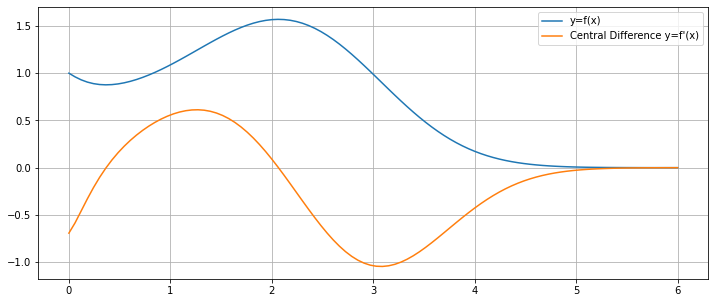

In [83]:
#Testing:
#Derivitive of Cosine
derivative(np.cos,0)

#More complex function y = (4x^2+2x+1/(x+2e^x)^x
x = np.linspace(0,6,100)
f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
y = f(x)
dydx = derivative(f,x)
plotDerivitive(x, y, f, dydx)



In [84]:
#Cheating a little - partial derivitives
from sympy import Symbol, Derivative

x= Symbol('x')
y= Symbol('y')

function = x**2 * y**4 + 4*y**4

partialderiv= Derivative(function, y)
partialderiv.doit()


4*x**2*y**3 + 16*y**3

## Integration

As we continue our journey we approach the next leg of the calculus mountain; integrals. Let us begin by analyzing basic integrals interms of a midpoint integration method where we sum the areas of the rectangles under the curves for each function with the smallest error possible. We can also utlize the shape of trapezoids for this computation. Let's see what the error we get looks like...


<img src="https://www.storyofmathematics.com/wp-content/uploads/2021/05/the-three-techniques-used-for-approximating-integrals.png" />
 


In [85]:
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

def trapezoidal(f, a, b, n):
    h = float(b-a)/n
    result = 0.5*f(a) + 0.5*f(b)
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result

In [86]:
from math import exp

#Testing integrals
g = lambda y: exp(-y**2)
a = 0
b = 2
print ('    n        midpoint          trapezoidal')
for i in range(1, 21):
    n = 2**i
    m = midpoint(g, a, b, n)
    t = trapezoidal(g, a, b, n)
    print ('%7d %.16f %.16f' % (n, m, t))

    n        midpoint          trapezoidal
      2 0.8842000076332692 0.8770372606158094
      4 0.8827889485397279 0.8806186341245393
      8 0.8822686991994210 0.8817037913321336
     16 0.8821288703366458 0.8819862452657772
     32 0.8820933014203766 0.8820575578012112
     64 0.8820843709743319 0.8820754296107942
    128 0.8820821359746071 0.8820799002925637
    256 0.8820815770754198 0.8820810181335849
    512 0.8820814373412922 0.8820812976045025
   1024 0.8820814024071774 0.8820813674728968
   2048 0.8820813936736116 0.8820813849400392
   4096 0.8820813914902204 0.8820813893068272
   8192 0.8820813909443684 0.8820813903985197
  16384 0.8820813908079066 0.8820813906714446
  32768 0.8820813907737911 0.8820813907396778
  65536 0.8820813907652575 0.8820813907567422
 131072 0.8820813907631487 0.8820813907610036
 262144 0.8820813907625702 0.8820813907620528
 524288 0.8820813907624605 0.8820813907623183
1048576 0.8820813907624268 0.8820813907623890


Now lets visualize it as area!

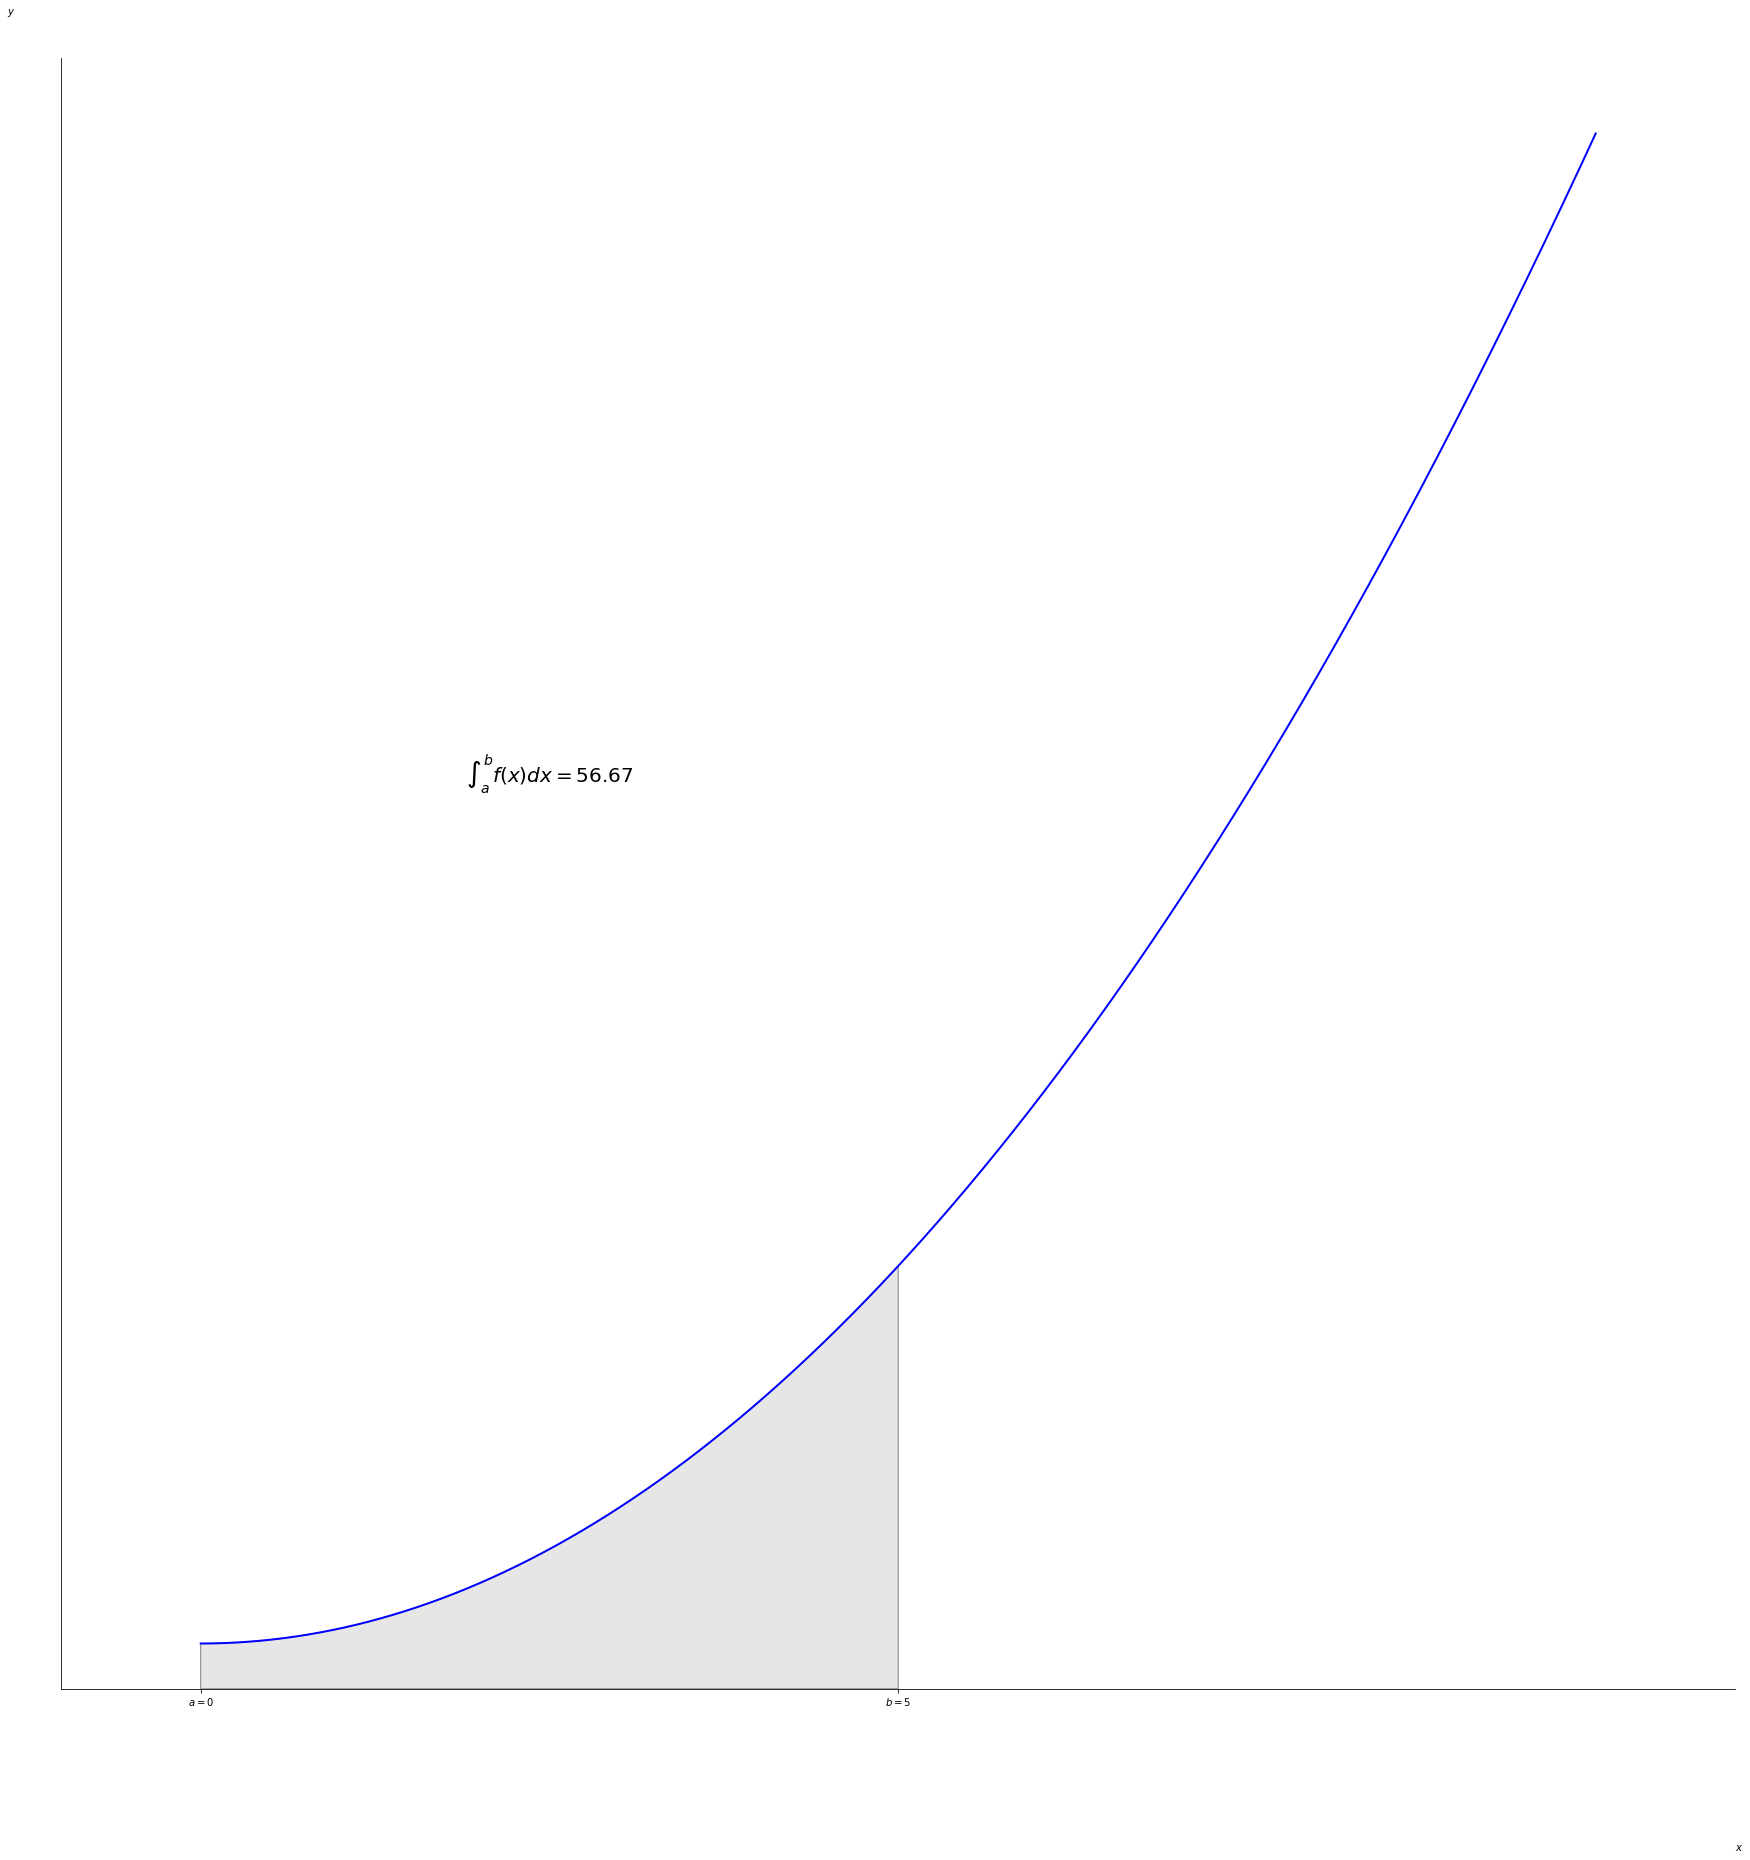

In [87]:
import numpy as np
import matplotlib.pylab as pl
from matplotlib.patches import Polygon

# Function definition.
def f(x):
    return x ** 2 + 3

# Integration calculation.
def integration(a, b, n):
    dx = (b - a) / n
    integration = 0
    for i in np.arange(1, n + 1):
        integration += f(a + i * dx)
    integration *= dx
    return integration

# Define integral limits.
a, b = 0, 5

# Define x and y arrays.
x = np.linspace(0, 10, 10000)
y = f(x)

# Plot x and y.
fig, ax = pl.subplots()
pl.plot(x, y, 'b', linewidth = 2)
pl.xlim(xmin = -1, xmax = 11)
pl.ylim(ymin = 0)

# Shade area of the integration beneath the f(x) curve.
ix = np.linspace(a, b, 10000)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor = '0.9', edgecolor = '0.5')
ax.add_patch(poly)

# Print equation text.
pl.text(0.5 * (a + b), 60, r"$\int_{a}^{b}f(x)dx=%.2f$" %integration(a, b, 10000),
horizontalalignment = 'center', fontsize = 20)

# Add x and y axes labels.
pl.figtext(0.9, 0.05, '$x$')
pl.figtext(0.1, 0.9, '$y$')

# Remove right and top plot delimeter lines.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

# Add a and b ticks on x axis.
ax.set_xticks((a, b))
ax.set_xticklabels(('$a=%d$' %a, '$b=%d$' %b))
ax.set_yticks([])

# Show the plot.
pl.show()

#### Double and Triple Integration

In [88]:
from scipy import integrate
#Testing
f = lambda y, x: x*y**2
print(integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1))

f = lambda z, y, x: x*y*z
print(integrate.tplquad(f, 1, 2, lambda x: 2, lambda x: 3,
                  lambda x, y: 0, lambda x, y: 1))

(0.6666666666666667, 7.401486830834377e-15)
(1.8750000000000002, 3.324644794257407e-14)


## 3D Functions and Vector Fields
What do these functions actually look like?

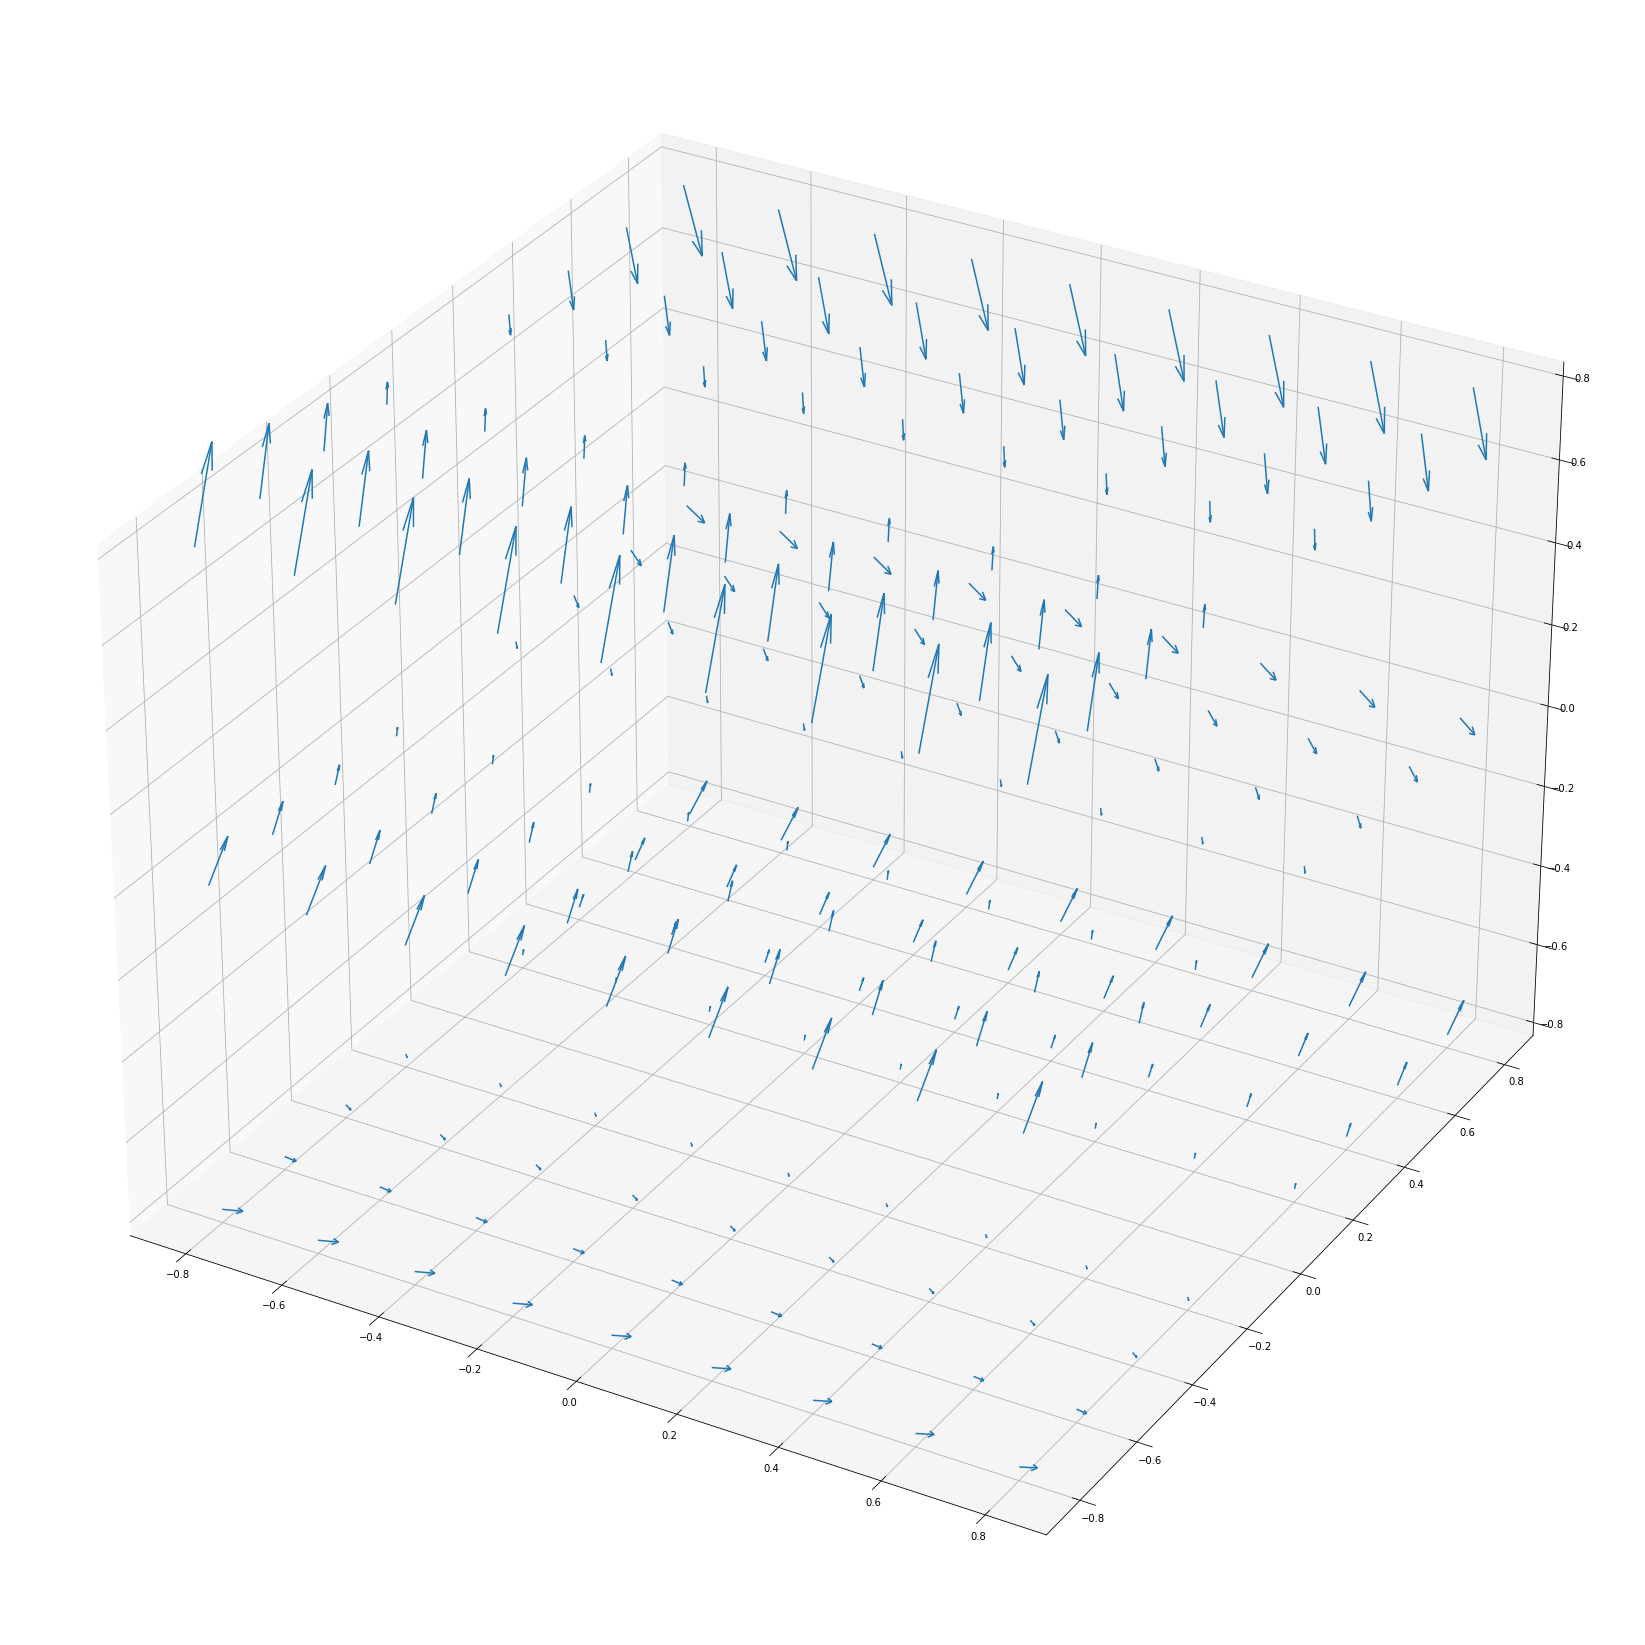

In [89]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = 0
v = y**2
w = -2*y*z - y

ax.quiver(x, y, z, u, v, w, length=0.1)

plt.show()

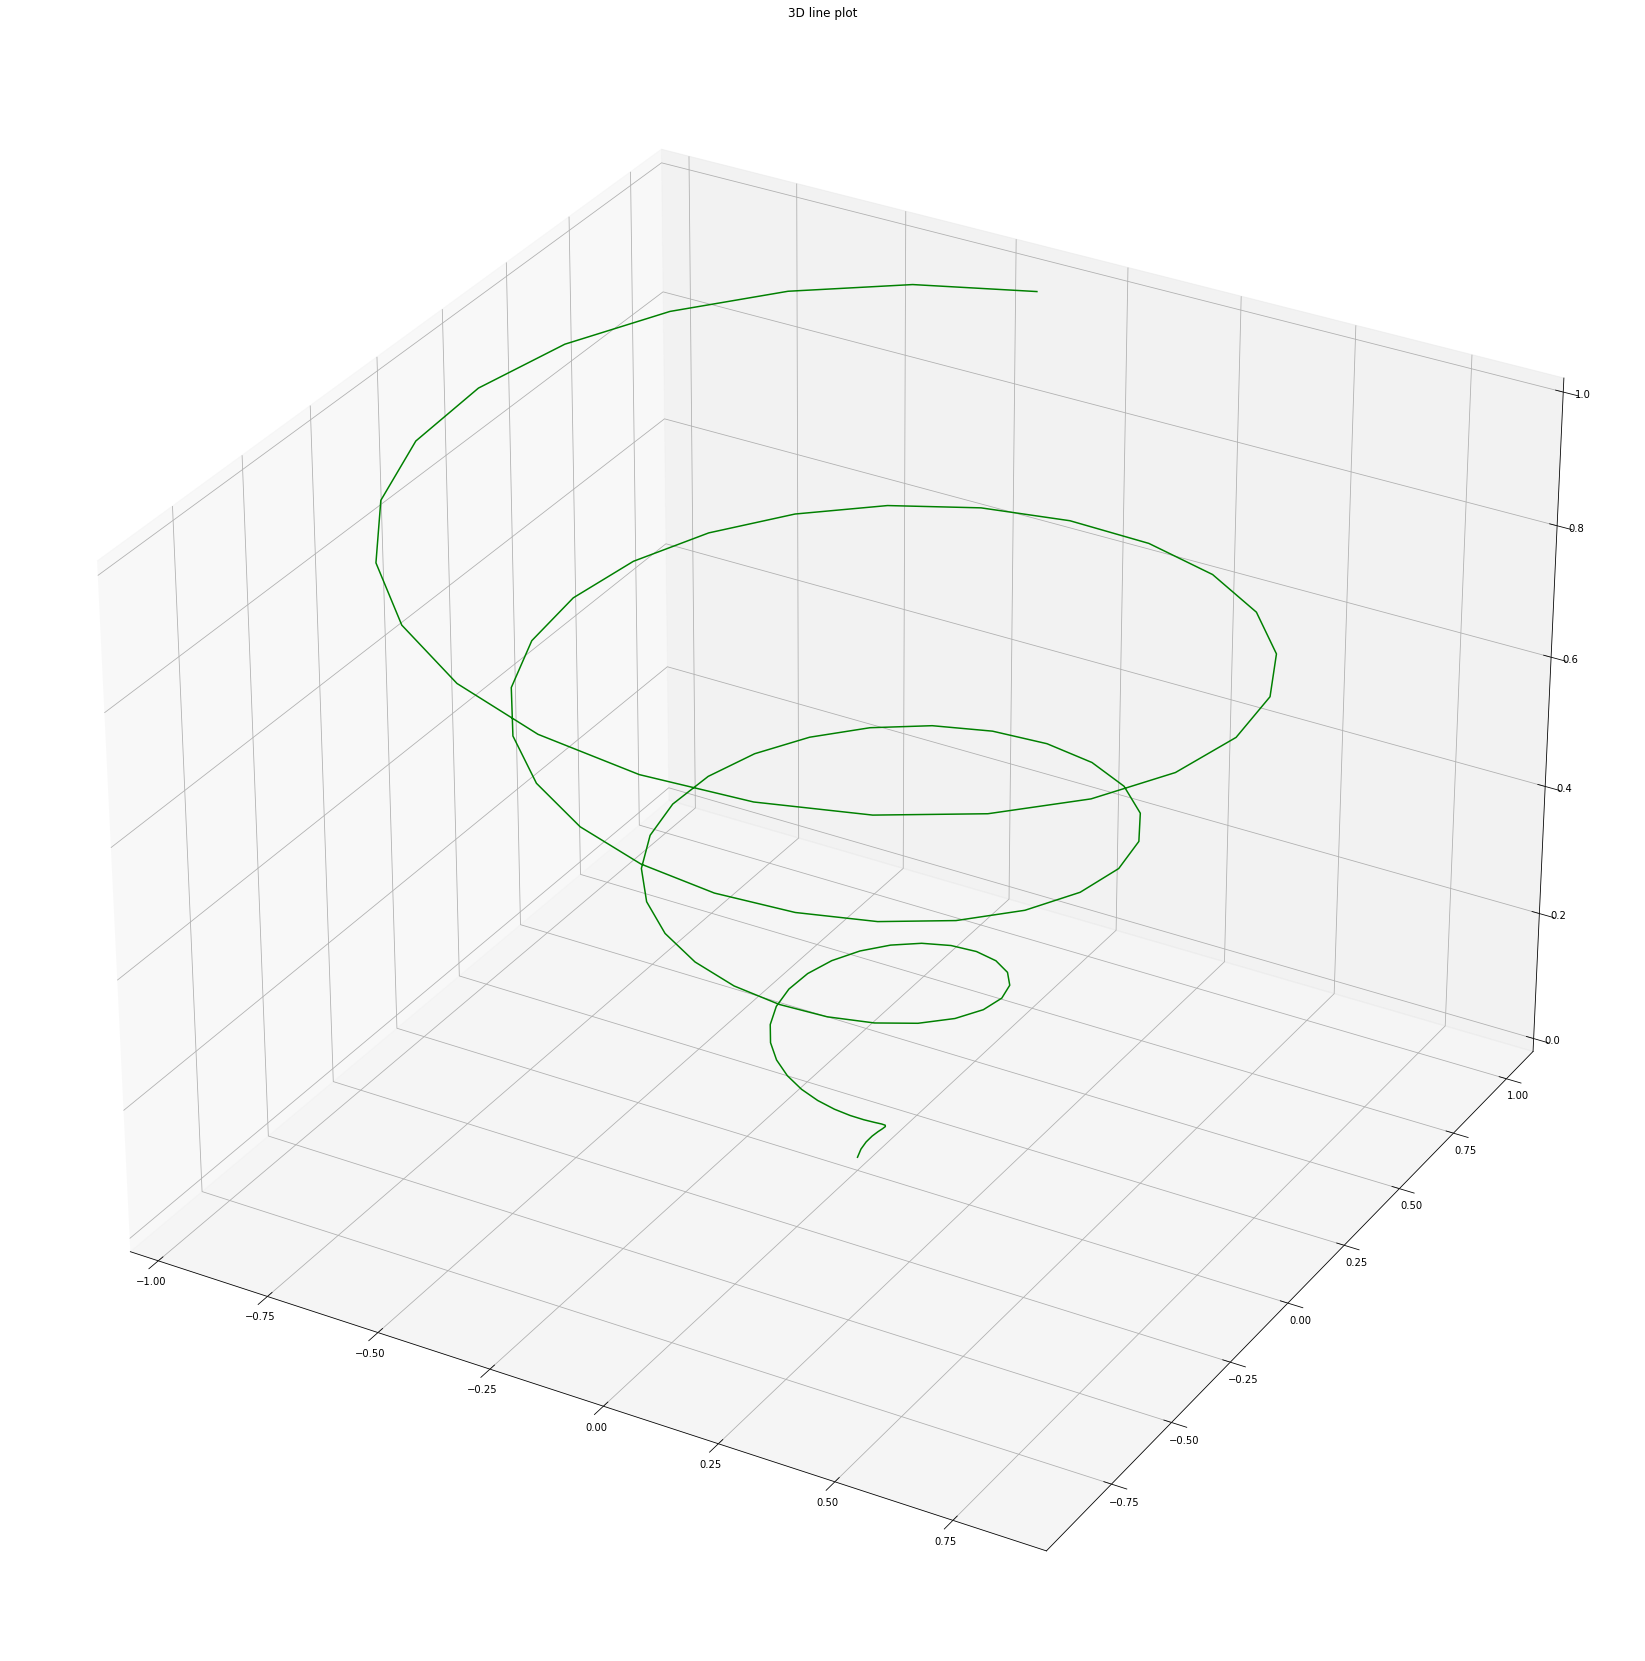

In [90]:

# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot')
plt.show()

## The Big Three

Visualizng grad, curl, and divergence of a function. 

### Gradient
To compute the grad of a function we can use the same derivitive function above and instead only change a certain variable. 


In [91]:
import numdifftools as nd
  
  
g = lambda x:(x**4)+x + 1
grad1 = nd.Gradient(g)([1])
print("Gradient of x ^ 4 + x+1 at x = 1 is ", grad1)
  
def rosen(x): 
    return (1-x[0])**2 +(x[1]-x[0]**2)**2
  
grad2 = nd.Gradient(rosen)([1, 2])
print("Gradient of (1-x ^ 2)+(y-x ^ 2)^2 at (1, 2) is ", grad2)

Gradient of x ^ 4 + x+1 at x = 1 is  5.000000000000002
Gradient of (1-x ^ 2)+(y-x ^ 2)^2 at (1, 2) is  [-4.  2.]


We can visualize this gradient in a real world application of gradient through gradient descent. In gradient descent, a machine learning algorithim tries to find the most ideal parameters for a hypothesis function in order to get the least amount of prediction error. In this case, gradients are used at each point to determine the direction the parameters must travel to reach a local min. 

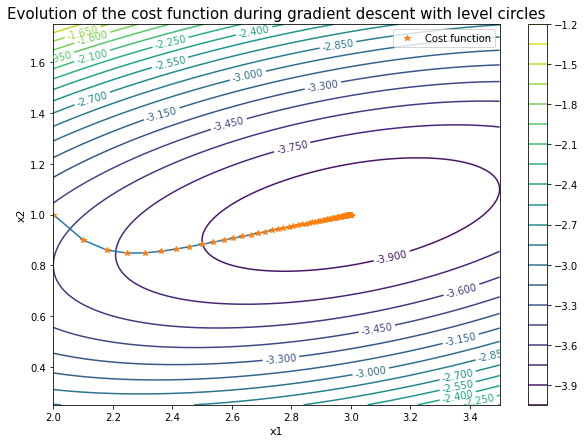

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *

def function(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)
    
def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])

def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)
# We initialize our variables x1 and x2 with arbitrary values :
x1, x2 = 2, 1

# We initialize our gradient value as well :
grad_f = gradient(x1, x2)

# We set a value for our step t (the bigger t is, the faster our algorithm converges - 
# but if t is too big, our algorithm may diverge, so be careful and test several values for the step).
t = 0.1

# We also set a value for the "epsilon" threshold: 
# we will stop the iteration as soon as the distance traveled during the gradient descent is less than the set threshold.
epsilon = pow(10,-6)

n_grad = norm(grad_f)
i = 1
f_value = function(x1, x2)
diff_f = 0
L_diff = []
evolution_X1_X2 = [[x1, x2]]

# Gradient descent :

while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    diff_f = function(x1, x2) - f_value
    L_diff.append(diff_f)
    f_value = function(x1, x2)
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1    
    
    
# We retrieve the evolution of our two variables X1 and X2 in the evolution_X1_X2 array :
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

x1 = np.linspace(2, 3.5, 150)
x2 = np.linspace(0.25, 1.75, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = function(X1, X2)


fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)

plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")

plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

### Curl
Now, lets move on to the next start of the show, curl! What does it look like?

In [93]:
import numpy as np

# Here is a algorithmic implementation for curl!
def curl(x,y,z,u,v,w):
    dx = x[0,:,0]
    dy = y[:,0,0]
    dz = z[0,0,:]

    dummy, dFx_dy, dFx_dz = np.gradient (u, dx, dy, dz, axis=[1,0,2])
    dFy_dx, dummy, dFy_dz = np.gradient (v, dx, dy, dz, axis=[1,0,2])
    dFz_dx, dFz_dy, dummy = np.gradient (w, dx, dy, dz, axis=[1,0,2])

    rot_x = dFz_dy - dFy_dz
    rot_y = dFx_dz - dFz_dx
    rot_z = dFy_dx - dFx_dy

    l = np.sqrt(np.power(u,2.0) + np.power(v,2.0) + np.power(w,2.0));

    m1 = np.multiply(rot_x,u)
    m2 = np.multiply(rot_y,v)
    m3 = np.multiply(rot_z,w)

    tmp1 = (m1 + m2 + m3)
    tmp2 = np.multiply(l,2.0)

    av = np.divide(tmp1, tmp2)

    return rot_x, rot_y, rot_z, av

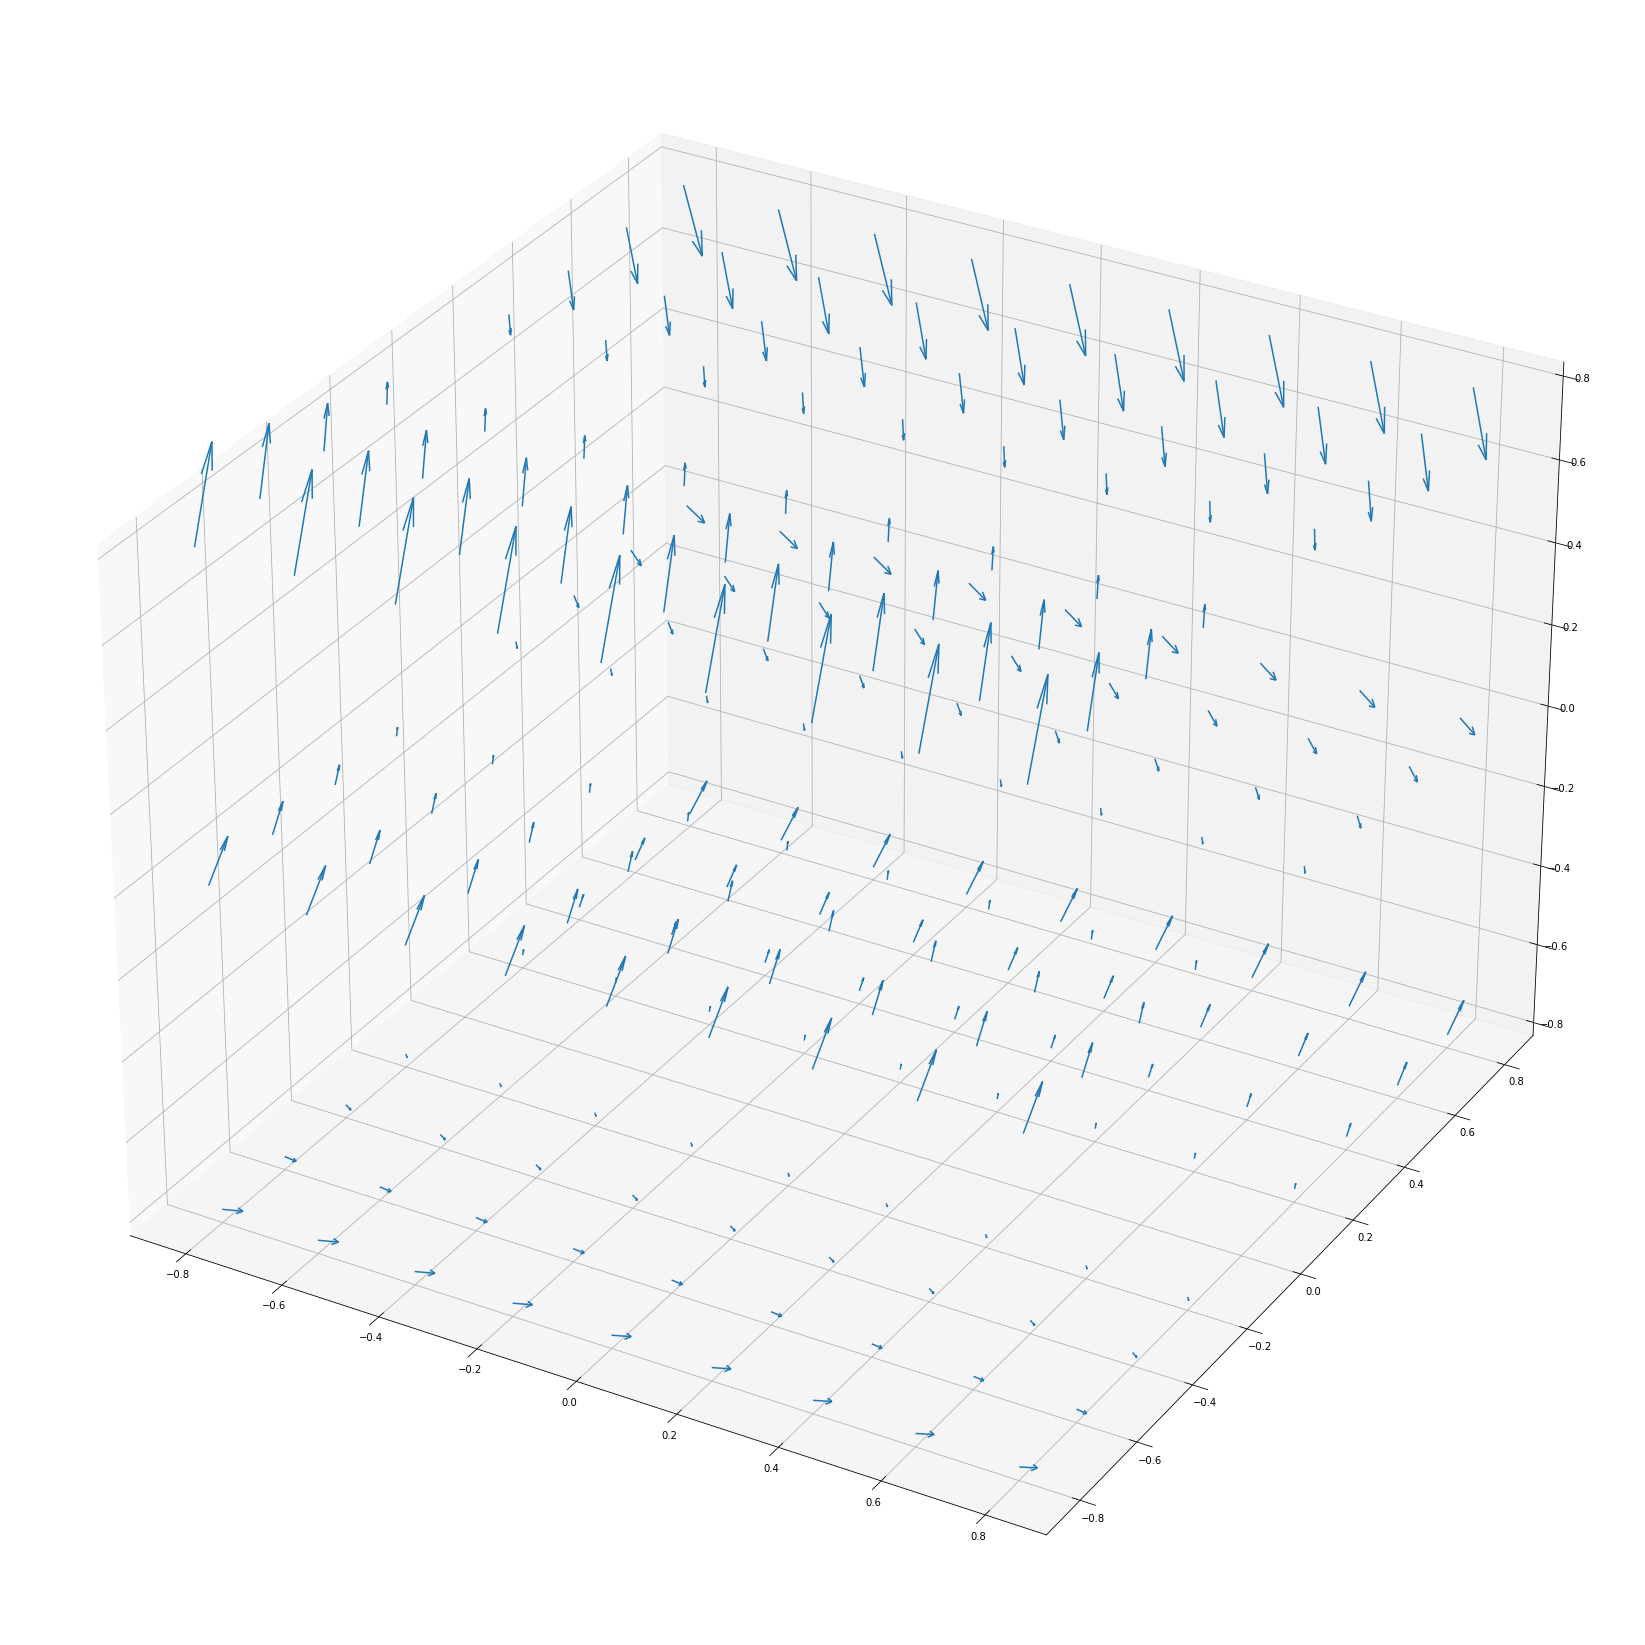

In [94]:
# Now let's visualize
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

R = ReferenceFrame('R')

F = R[1]**2 * R[2] * R.x - R[0]*R[1] * R.y + R[2]**2 * R.z

G = curl(F, R)  

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = 0
v = y**2
w = -2*y*z - y

ax.quiver(x, y, z, u, v, w, length=0.1)

plt.show()

### Divergence
Lets plot away

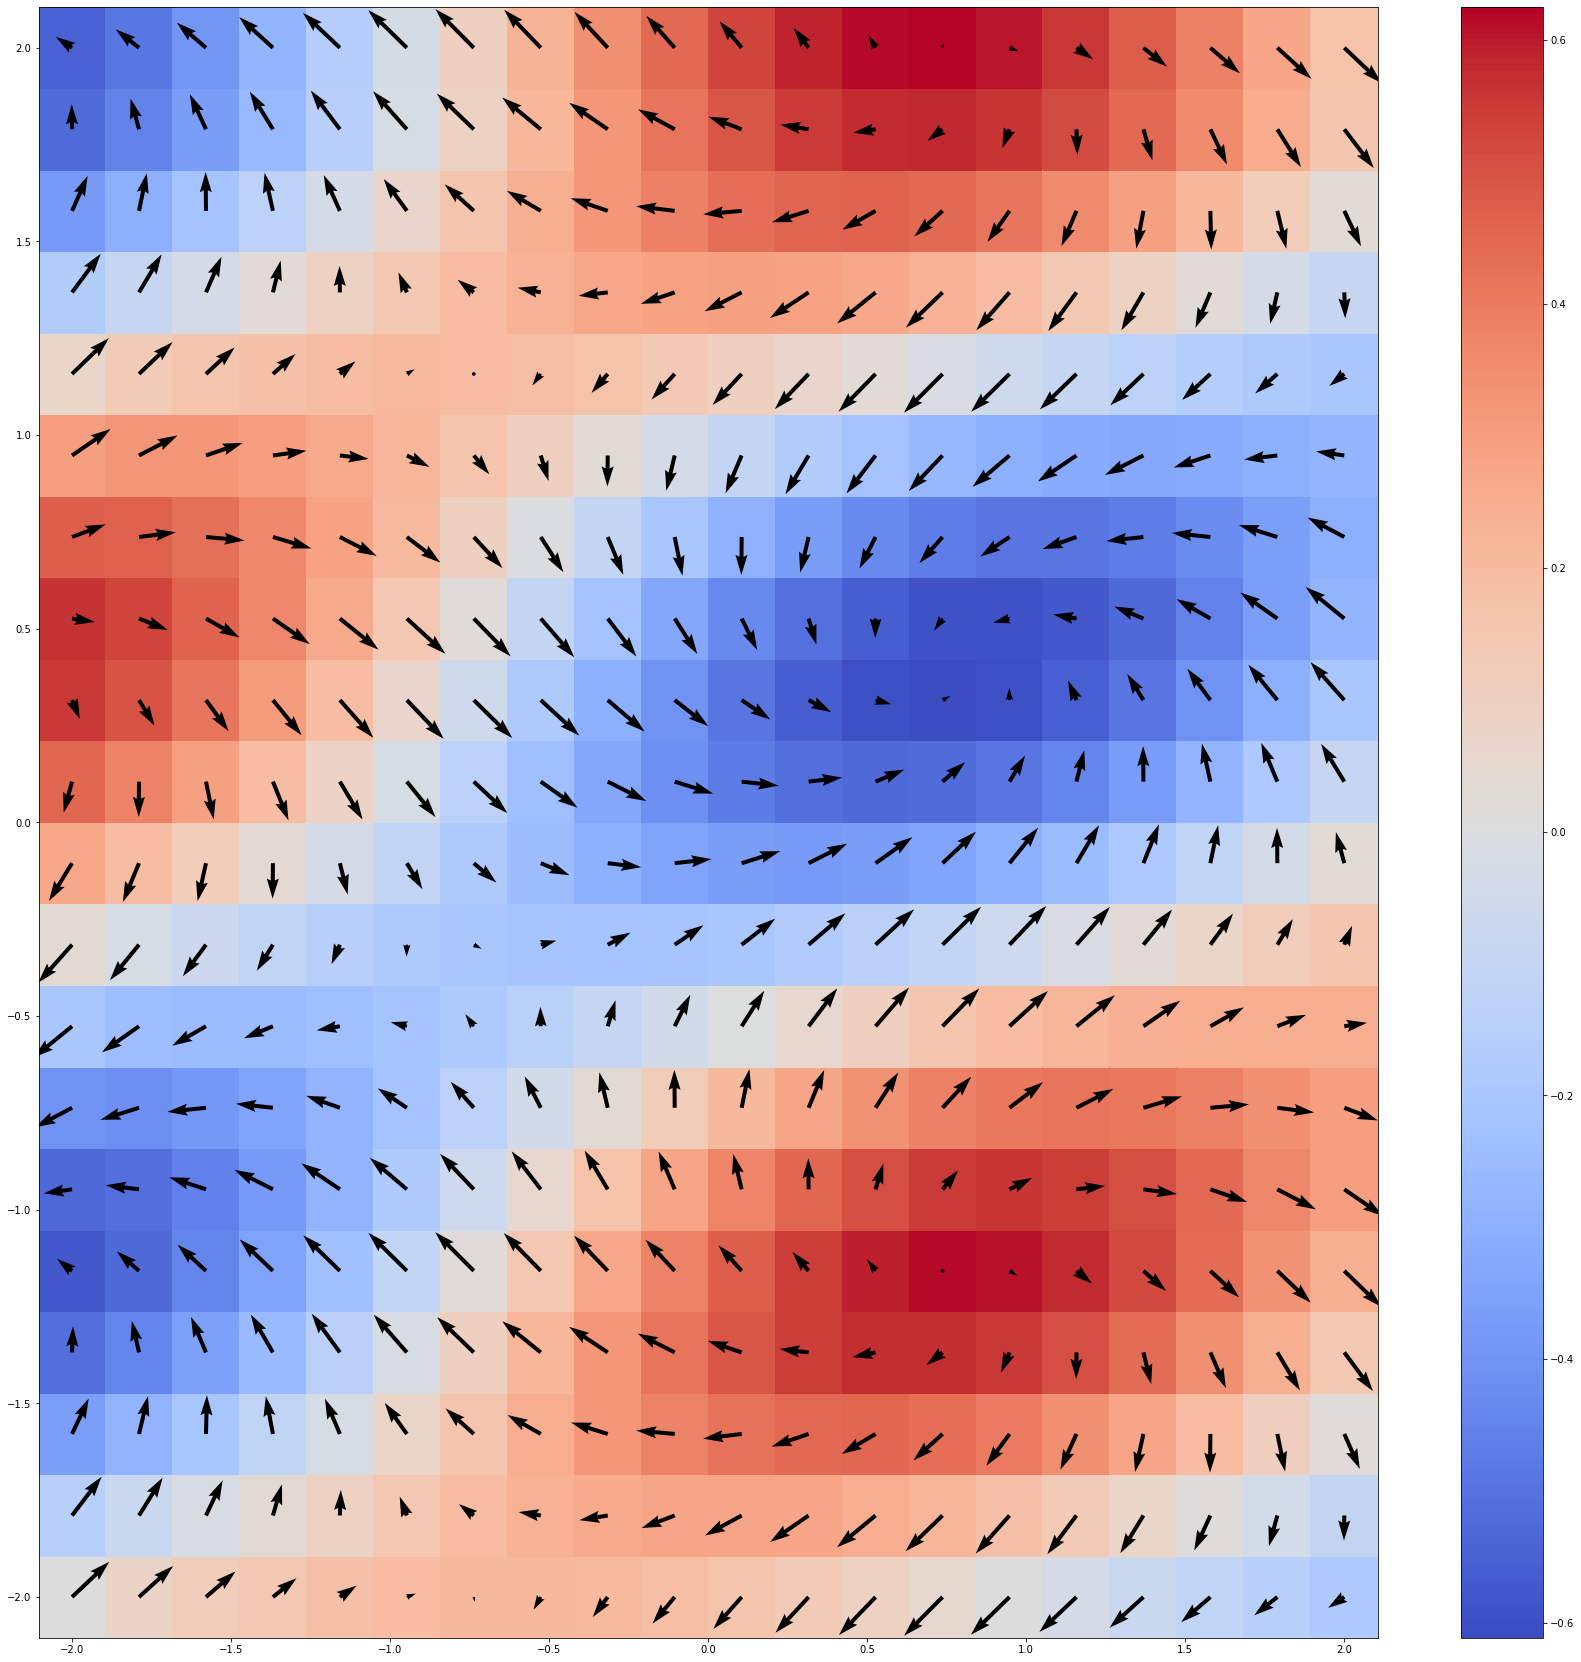

In [95]:
import numpy as np
import matplotlib.pyplot as plt

NY = 20; ymin = -2.; ymax = 2.
dy = (ymax -ymin )/(NY-1.)
NX = NY
xmin = -2.; xmax = 2.
dx = (xmax -xmin)/(NX-1.)

def divergence(f):
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], axis=i) for i in range(num_dims)])

y = np.array([ ymin + float(i)*dy for i in range(NY)])
x = np.array([ xmin + float(i)*dx for i in range(NX)])

x, y = np.meshgrid( x, y, indexing = 'ij', sparse = False)

Fx  = np.cos(x + 2*y)
Fy  = np.sin(x - 2*y)


F = [Fx, Fy]
g = divergence(F)

plt.pcolormesh(x, y, g, shading='nearest', cmap=plt.cm.get_cmap('coolwarm'))
plt.rcParams['figure.figsize'] = [30, 30]

plt.colorbar()
plt.quiver(x,y,Fx,Fy)


## Arclengths
We continue our journey...

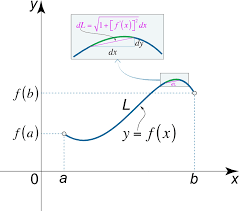

In [96]:
def arc_length(f,a,b,h=0.001,N=1000):
    '''Approximate the arc length of y=f(x) from x=a to x=b.

    Parameters
    ----------
    f : (vectorized) function of one variable
    a,b : numbers defining the interval [a,b]
    h : step size to use in difference formulas
    N : number of subintervals in trapezoid method

    '''
    x = np.linspace(a,b,N+1)
    y = f(x)

    # Compute central difference formula for x_k for 1 &lt;= k &lt;= N-1
    h = np.min([h,(b-a)/N]) # Make sure that h is smaller than the size of the subintervals
    x_interior = x[1:-1]
    df_interior = (f(x_interior + h) - f(x_interior - h))/(2*h)

    # Use forward/backward difference formula at the endpoints
    df_a = (f(a + h) - f(a))/h
    df_b = (f(b) - f(b - h))/h
    df = np.hstack([[df_a],df_interior,[df_b]])

    # Compute values of the integrand in arc length formula
    y = np.sqrt(1 + df**2)

    # Compute the integral
    L = spi.trapz(y,x)

    return L

## Line Integrals

The last stop on our journey is the line integral

<img src='https://www.wikihow.com/images/e/ed/VIBrO.jpg' />



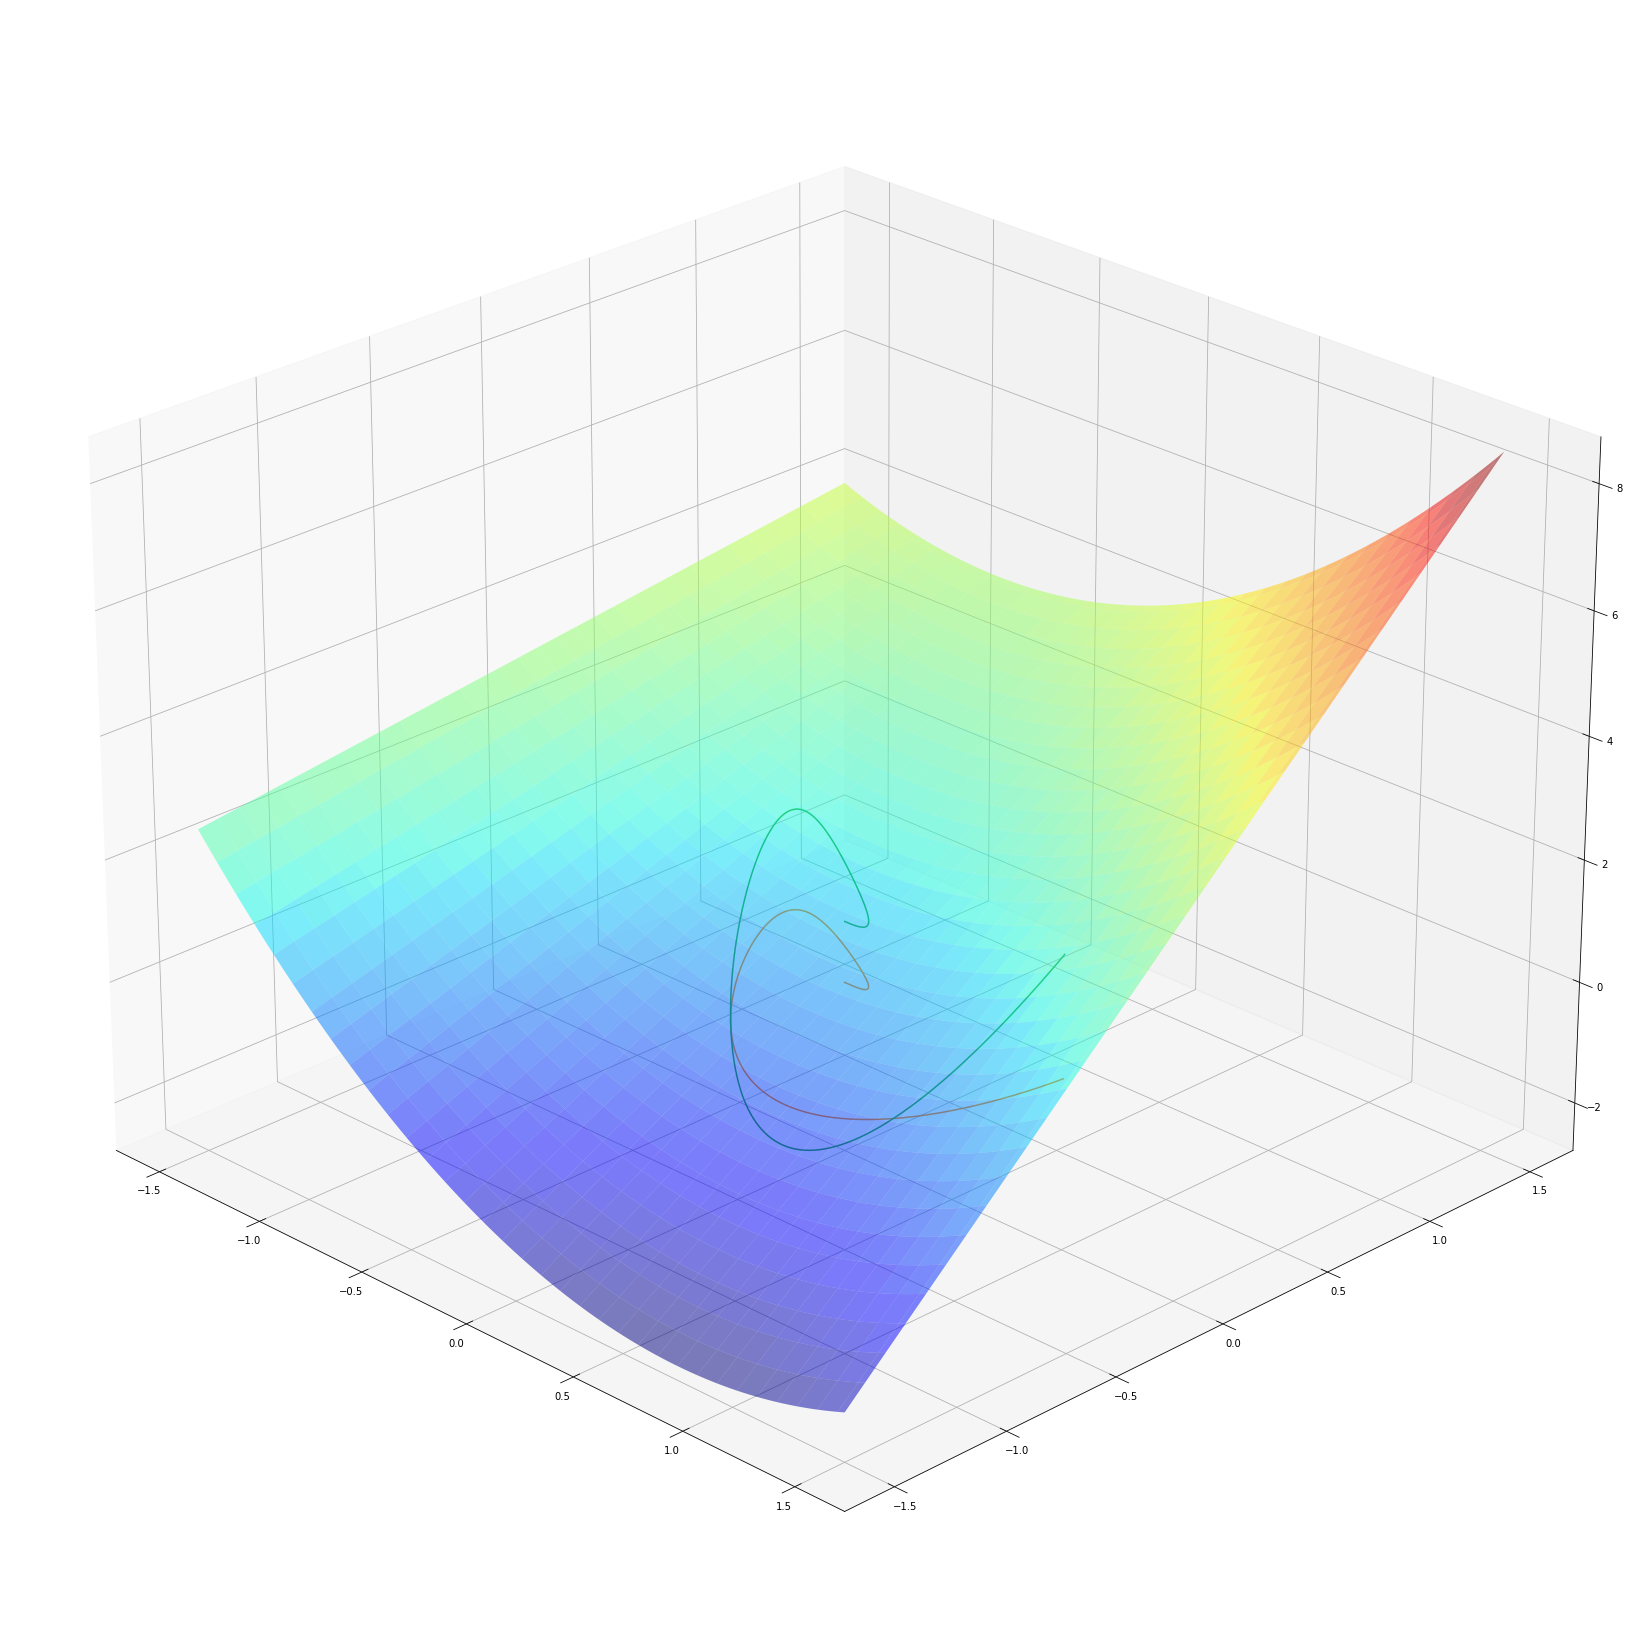

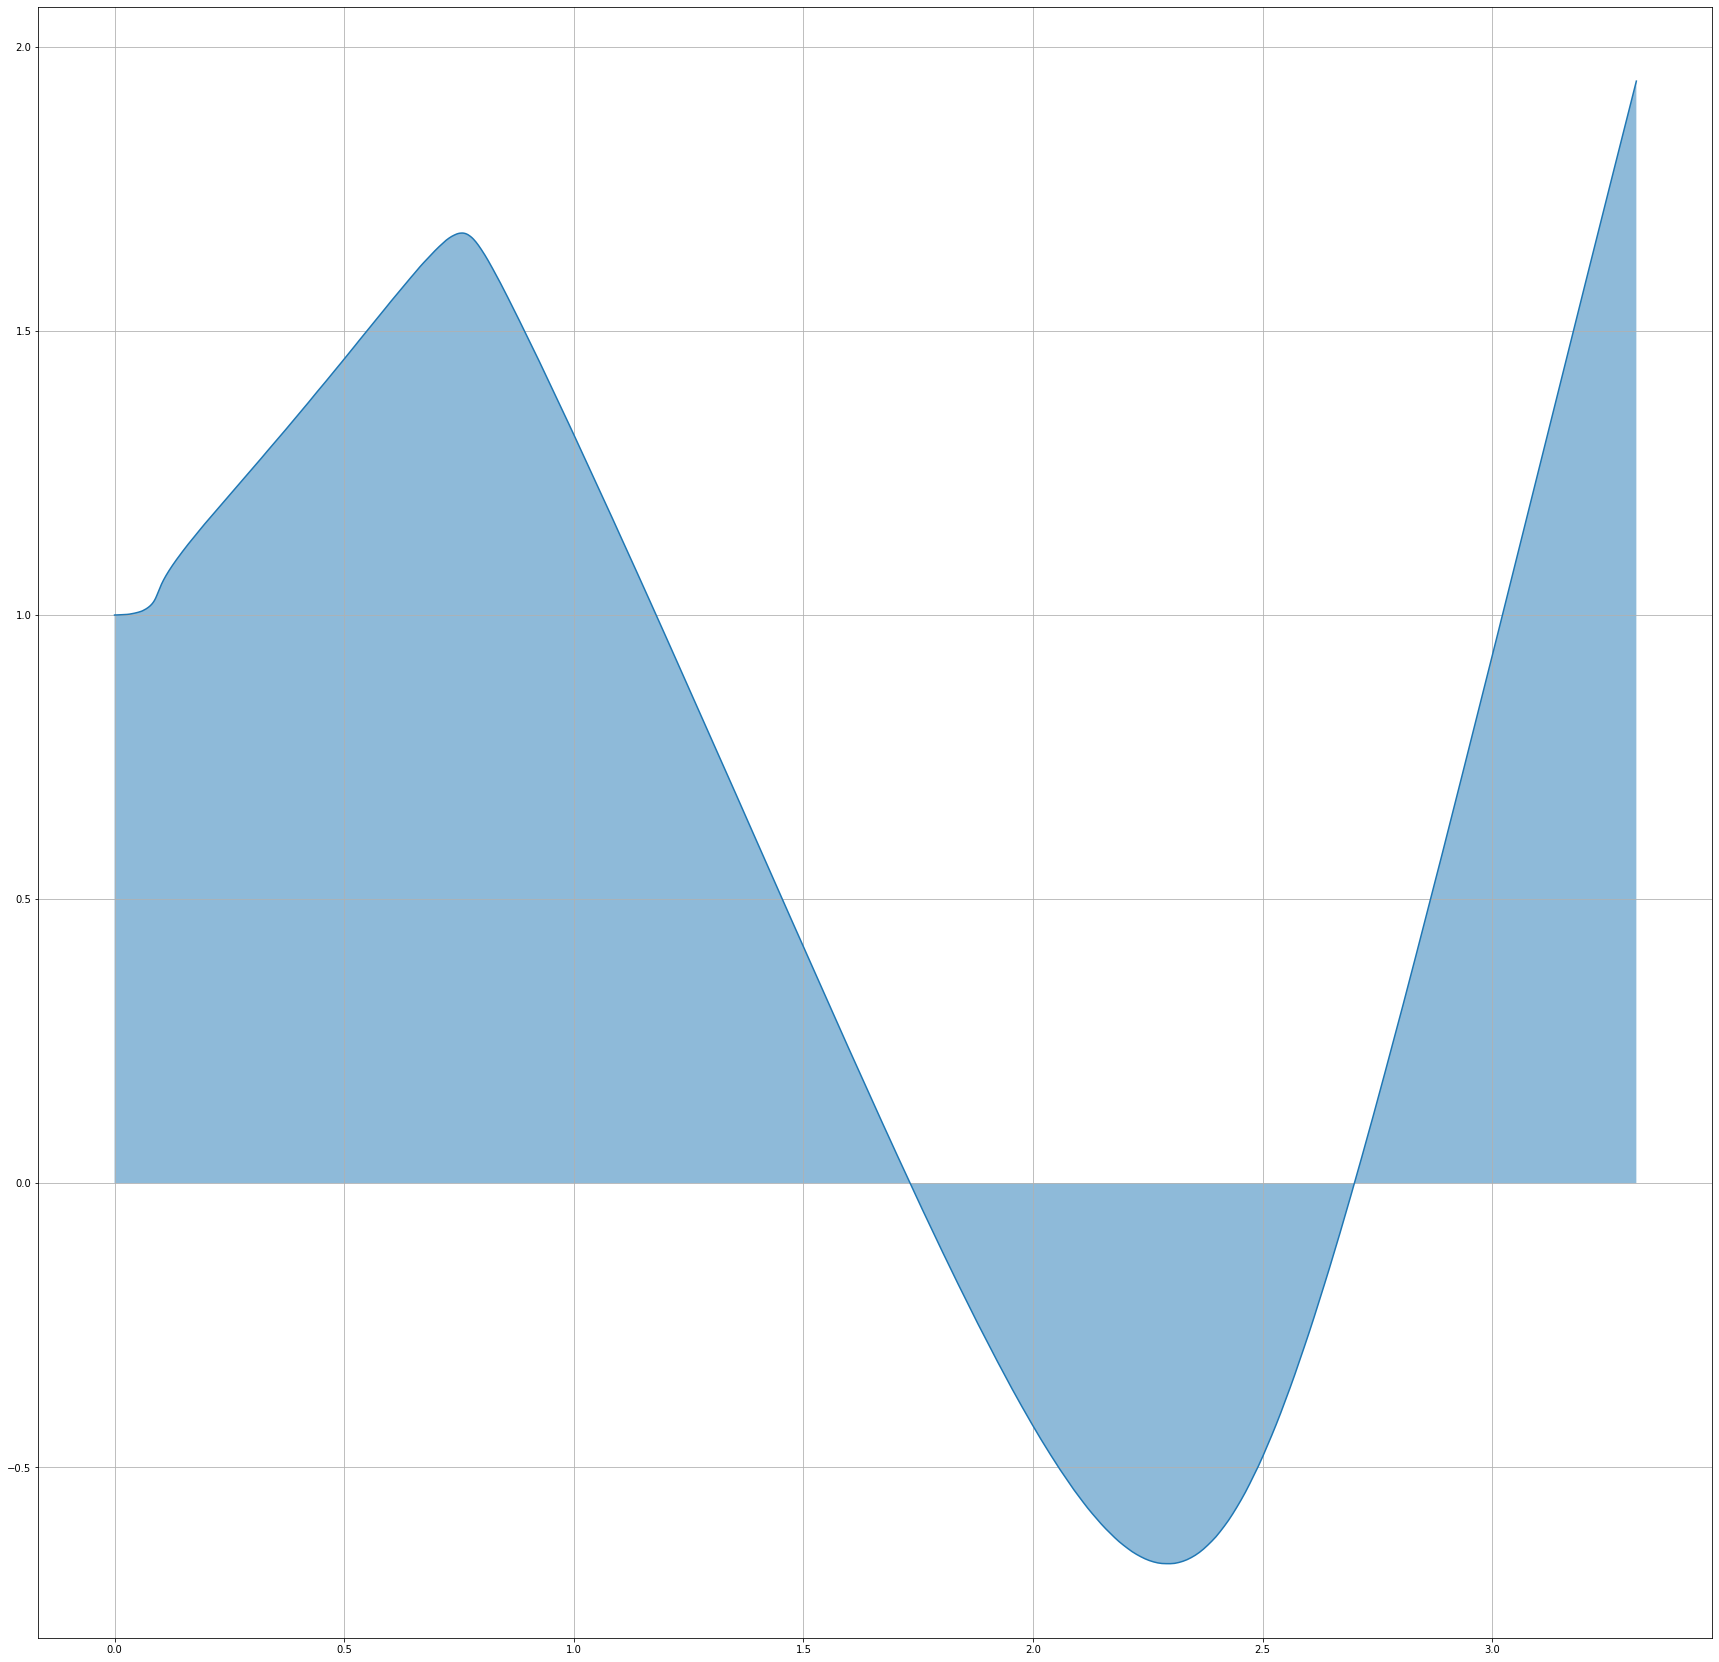

In [97]:
import numpy as np
from scipy import interpolate

def f(x, y):
    return x**2 + x*y + y*2 + 1

xl = np.linspace(-1.5, 1.5, 101)
X, Y = np.meshgrid(xl, xl)
Z = f(X, Y)


t = np.linspace(0, 1, 1001)
xt = t**2*np.cos(2*np.pi*t**2)
yt = t**3*np.sin(2*np.pi*t**3)


#Create a multidimensional linear interpolator
XY = np.stack([X.ravel(), Y.ravel()]).T
S = interpolate.LinearNDInterpolator(XY, Z.ravel())

#We also compute the curvilinear coordinates of the 2D curve:

xyt = np.stack([xt, yt]).T
St = S(xyt)

Sd = np.cumsum(np.sqrt(np.sum(np.diff(xyt, axis=0)**2, axis=1)))

axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
axe.plot(xt, yt, 0)
axe.plot(xt, yt, St)
axe.view_init(elev=25, azim=-45)


#Using curvilinear coordinates based on cumulative arc length, the integral to solve looks like:
fig, axe = plt.subplots()
axe.plot(Sd, St[:-1])
axe.fill_between(Sd, St[:-1], alpha=0.5)
axe.grid()

#Finally solve:
I = np.trapz(St[:-1], Sd) # 2.041770932394164

Sources:
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives

https://hplgit.github.io/prog4comp/doc/pub/._p4c-bootstrap-Python017.html

https://newbedev.com

https://stackoverflow.com/

http://www.eg.bucknell.edu/physics/ph329/jupyter/line_integral